# Color Threshold. BlueScreen
## Import resources

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

## Read in the image

In [29]:
# Read in the image
image = cv2.imread('data/images/pizza_bluescreen.jpg')
# Print out the type of image dat and its dimensions
# (height, width and color)
print('This image is: {} with dimensions: {}'.
    format(type(image), image.shape))

This image is: <class 'numpy.ndarray'> with dimensions: (514, 816, 3)


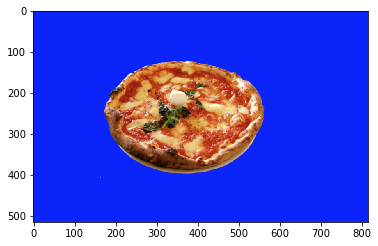

In [30]:
# Make a copy of he image
image_copy = np.copy(image)

# Change the color from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

Define the color threshold

In [31]:
# Define the color selection boundaries in RGB values
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([255, 255, 255])

Create a mask


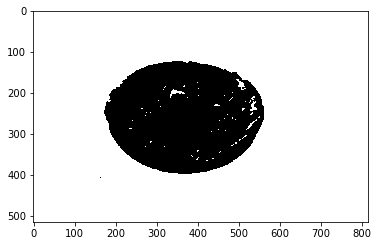

In [32]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap='gray')

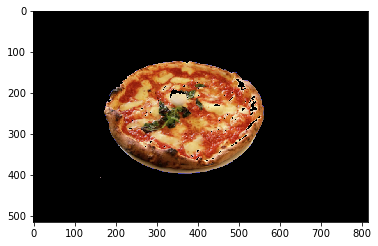

In [36]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

# Mask and add a background image

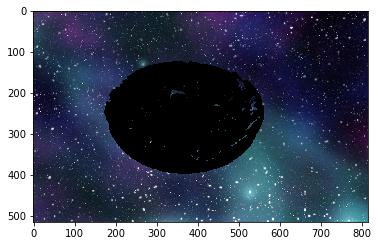

In [37]:
# Load in a background image, and convert it to RGB
background_image = cv2.imread('data/images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

Create a complete image


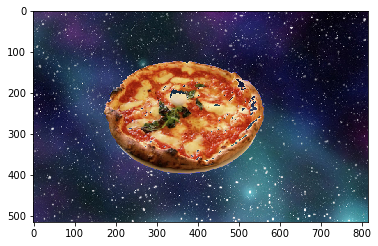

In [38]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)